In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
import matplotlib_inline
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [27]:
files = { 1: ["./plotdata/30_CPX_T.txt","./plotdata/30_AUTO_T.txt",
               "./plotdata/30_BD_T.txt", "./plotdata/30_RBD_T.txt"],
          2: ["./plotdata/30_CPX_G.txt","./plotdata/30_AUTO_G.txt",
               "./plotdata/30_BD_G.txt", "./plotdata/30_RBD_G.txt"]}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


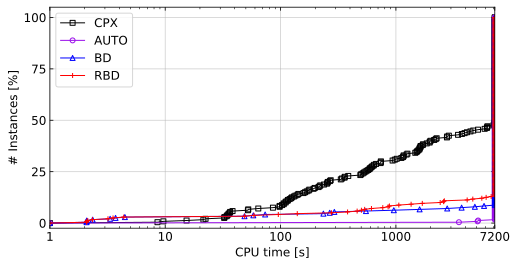

In [28]:
labels = [r'CPX', r'AUTO', r'BD', r'RBD']
linesty = ['-', '-']
colors = ['k', '#9A0EEA', 'b','r']
markers = ['s', 'o','^', '+']
markerfacecolors=['none', 'none', 'none','none']
sizes=[5, 5, 5, 5]
fontsize=12

for i in range(1, 2):
   x = [[] for _ in range(len(files[i]))]
   y = [[] for _ in range(len(files[i]))]
   for j in range(len(files[i])):
      fd = open(files[i][j])
      f = fd.readlines()
      for t in range(len(f)):
         x[j].append(float(f[t]))
      fd.close()
      x[j].sort()
      y[j]=[(i+1) * 100/(len(x[j])) for i in range(len(x[j]))]
      if x[j][0] > 1.0:
         x[j].insert(0, 1.0)
         y[j].insert(0, 1/(len(x[j])))
      x[j].append(7200)
      y[j].append(100.0)

   fig, ax = plt.subplots(figsize=(8,4))
   for j in range(len(files[i])):
      ax.plot(x[j], y[j], color=colors[j], linestyle=linesty[j% len(linesty)], marker=markers[j], markerfacecolor=markerfacecolors[j], markersize=sizes[j],label=labels[j], linewidth=1)
   ax.set_xlabel('CPU time [s]', fontsize=fontsize)
   ax.set_xscale('log')
   ax.set_xticks([1, 10, 100, 1000, 7200], ["1", "10", "100", "1000", "7200"],fontsize=fontsize)
   ax.set_xlim((1, 7200))
   ax.set_yticks([0, 25, 50, 75, 100], ["0", "25", "50", "75", "100"],fontsize=fontsize)
   ymin,ymax = ax.get_ylim()  # 获取当前 y 轴范围
   yticks = ax.get_yticks()  # 获取当前 y 轴上的刻度值
   ax.set_ylim(ymin+0.1 * (yticks[1]-yticks[0]), ymax)  # 将 y 轴下限向下移动 0.1
   plt.rcParams['xtick.direction']='in'
   plt.rcParams['ytick.direction']='in'
   plt.tick_params(top='on', right='on', which='both')
   

   ax.set_ylabel('# Instances [%]', fontsize=fontsize)
   ax.grid(True,which='minor', linestyle='dashed', alpha=0)
   ax.grid(True, which='major', alpha=0.6)
   ax.grid(True)
   ax.legend(loc='upper left', fontsize=fontsize)
   plt.savefig('30_T.eps', format='eps', bbox_inches='tight', pad_inches=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


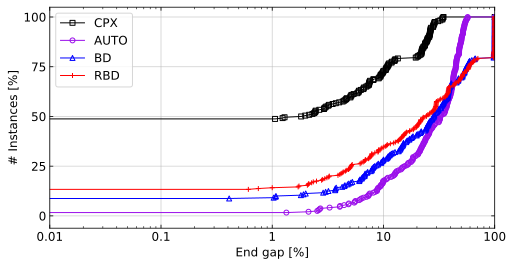

In [29]:
labels = [r'CPX', r'AUTO', r'BD', r'RBD']
linesty = ['-', '-']
colors = ['k', '#9A0EEA', 'b','r']
markers = ['s', 'o','^', '+']
markerfacecolors=['none', 'none', 'none','none']
sizes=[5, 5, 5, 5]
fontsize=12

for i in range(2, 3):
    x = [[] for _ in range(len(files[i]))]
    y = [[] for _ in range(len(files[i]))]
    for j in range(len(files[i])):
        # num=0
        fd = open(files[i][j])
        f = fd.readlines()
        for t in range(len(f)):
            x[j].append(float(f[t]))
        fd.close()
        x[j].sort()
        num = len(x[j]) - np.count_nonzero(x[j])
        y[j]=np.concatenate((np.full(num,num*100/len(x[j])), np.arange(len(x[j])-num)*(1*100)/len(x[j])+(num+1)*100/len(x[j])))
        if x[j][0] > 0.01:
           x[j].insert(0, 0.01)
           y[j]=np.insert(y[j], 0, num*100/(len(x[j])-2))
        x[j].append(100)
        y[j]=np.append(y[j],y[j][len(y[j])-1])

    fig, ax = plt.subplots(figsize=(8,4))
    for j in range(len(files[i])):
        ax.plot(x[j], y[j], color=colors[j % len(colors)], linestyle=linesty[j % len(linesty)], marker=markers[j % len(markers)], markerfacecolor=markerfacecolors[j], markersize=sizes[j],label=labels[j], linewidth=1)
    ax.set_xscale('log')
    ax.set_xlabel('End gap [%]', fontsize=fontsize)
    # ax.set_xticks([0.01, 0.1, 1, 10, 100], ["$10^{-2}$", "$10^{-1}$", "$10^0$", "$10^1$", "$10^2$"], fontsize=fontsize)
    ax.set_xticks([0.01, 0.1, 1, 10, 100], ["0.01", "0.1", "1", "10", "100"], fontsize=fontsize)
    ax.set_yticks([0, 25, 50, 75, 100], ["0", "25", "50", "75", "100"],fontsize=fontsize)
    ax.set_xlim((0.01, 100))
    ymin,ymax = ax.get_ylim()  # 获取当前 y 轴范围
    yticks = ax.get_yticks()  # 获取当前 y 轴上的刻度值
    ax.set_ylim(ymin-0.1 * (yticks[1]-yticks[0]), ymax)  # 将 y 轴下限向下移动 0.1
    plt.rcParams['xtick.direction']='in'
    plt.rcParams['ytick.direction']='in'
    plt.tick_params(top='on', right='on', which='both')
     

    ax.set_ylabel('# Instances [%]', fontsize=fontsize)
    ax.grid(True,which='minor', linestyle='dashed', alpha=0)
    ax.grid(True, which='major', alpha=0.6)
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=fontsize)
    plt.savefig('30_G.eps', format='eps', bbox_inches='tight', pad_inches=0)

In [30]:
files2 = {1: ["./plotdata/30_CPX_T.txt","./plotdata/30_AUTO_T.txt",
               "./plotdata/30_DA_T.txt"],
          2: ["./plotdata/30_CPX_G.txt","./plotdata/30_AUTO_G.txt",
               "./plotdata/30_DA_G.txt"]}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


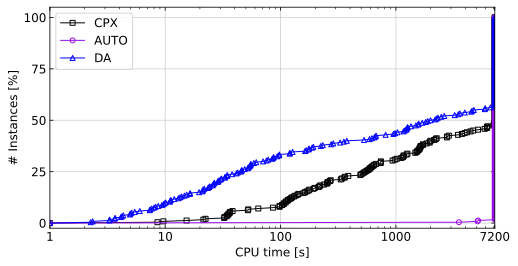

In [31]:
labels = [r'CPX', r'AUTO', r'DA']
linesty = ['-', '-']
colors = ['k', '#9A0EEA', 'b','r']
markers = ['s', 'o','^', '+']
markerfacecolors=['none', 'none', 'none','none']
sizes=[5, 5, 5, 5]
fontsize=12

for i in range(1, 2):
   x = [[] for _ in range(len(files2[i]))]
   y = [[] for _ in range(len(files2[i]))]
   for j in range(len(files2[i])):
      fd = open(files2[i][j])
      f = fd.readlines()
      for t in range(len(f)):
         x[j].append(float(f[t]))
      fd.close()
      x[j].sort()
      y[j]=[(i+1) * 100/(len(x[j])) for i in range(len(x[j]))]
      if x[j][0] > 1.0:
         x[j].insert(0, 1.0)
         y[j].insert(0, 1/(len(x[j])))
      x[j].append(7200)
      y[j].append(100.0)

   fig, ax = plt.subplots(figsize=(8,4))
   for j in range(len(files2[i])):
      ax.plot(x[j], y[j], color=colors[j], linestyle=linesty[j% len(linesty)], marker=markers[j], markerfacecolor=markerfacecolors[j], markersize=sizes[j],label=labels[j], linewidth=1)
   ax.set_xlabel('CPU time [s]', fontsize=fontsize)
   ax.set_xscale('log')
   ax.set_xticks([1, 10, 100, 1000, 7200], ["1", "10", "100", "1000", "7200"],fontsize=fontsize)
   ax.set_xlim((1, 7200))
   ax.set_yticks([0, 25, 50, 75, 100], ["0", "25", "50", "75", "100"],fontsize=fontsize)
   ymin,ymax = ax.get_ylim()  # 获取当前 y 轴范围
   yticks = ax.get_yticks()  # 获取当前 y 轴上的刻度值
   ax.set_ylim(ymin+0.1 * (yticks[1]-yticks[0]), ymax)  # 将 y 轴下限向下移动 0.1
   plt.rcParams['xtick.direction']='in'
   plt.rcParams['ytick.direction']='in'
   plt.tick_params(top='on', right='on', which='both')
   
   ax.set_ylabel('# Instances [%]', fontsize=fontsize)
   ax.grid(True,which='minor', linestyle='dashed', alpha=0)
   ax.grid(True, which='major', alpha=0.6)
   ax.grid(True)
   ax.legend(loc='upper left', fontsize=fontsize)
   plt.savefig('30_T2.eps', format='eps', bbox_inches='tight', pad_inches=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


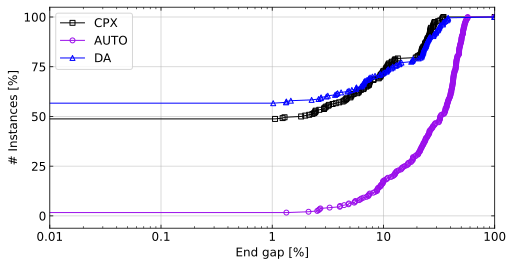

In [32]:
labels = [r'CPX', r'AUTO', r'DA']
linesty = ['-', '-']
colors = ['k', '#9A0EEA', 'b','r']
markers = ['s', 'o','^', '+']
markerfacecolors=['none', 'none', 'none','none']
sizes=[5, 5, 5, 5]
fontsize=12

for i in range(2, 3):
    x = [[] for _ in range(len(files2[i]))]
    y = [[] for _ in range(len(files2[i]))]
    for j in range(len(files2[i])):
        # num=0
        fd = open(files2[i][j])
        f = fd.readlines()
        for t in range(len(f)):
            x[j].append(float(f[t]))
        fd.close()
        x[j].sort()
        num = len(x[j]) - np.count_nonzero(x[j])
        y[j]=np.concatenate((np.full(num,num*100/len(x[j])), np.arange(len(x[j])-num)*(1*100)/len(x[j])+(num+1)*100/len(x[j])))
        if x[j][0] > 0.01:
           x[j].insert(0, 0.01)
           y[j]=np.insert(y[j], 0, num*100/(len(x[j])-2))
        x[j].append(100)
        y[j]=np.append(y[j],y[j][len(y[j])-1])

    fig, ax = plt.subplots(figsize=(8,4))
    for j in range(len(files2[i])):
        ax.plot(x[j], y[j], color=colors[j % len(colors)], linestyle=linesty[j % len(linesty)], marker=markers[j % len(markers)], markerfacecolor=markerfacecolors[j], markersize=sizes[j],label=labels[j], linewidth=1)
    ax.set_xscale('log')
    ax.set_xlabel('End gap [%]', fontsize=fontsize)
    # ax.set_xticks([0.01, 0.1, 1, 10, 100], ["$10^{-2}$", "$10^{-1}$", "$10^0$", "$10^1$", "$10^2$"], fontsize=fontsize)
    ax.set_xticks([0.01, 0.1, 1, 10, 100], ["0.01", "0.1", "1", "10", "100"], fontsize=fontsize)
    ax.set_yticks([0, 25, 50, 75, 100], ["0", "25", "50", "75", "100"],fontsize=fontsize)
    ax.set_xlim((0.01, 100))
    ymin,ymax = ax.get_ylim()  # 获取当前 y 轴范围
    yticks = ax.get_yticks()  # 获取当前 y 轴上的刻度值
    ax.set_ylim(ymin-0.1 * (yticks[1]-yticks[0]), ymax)  # 将 y 轴下限向下移动 0.1
    plt.rcParams['xtick.direction']='in'
    plt.rcParams['ytick.direction']='in'
    plt.tick_params(top='on', right='on', which='both')
     

    ax.set_ylabel('# Instances [%]', fontsize=fontsize)
    ax.grid(True,which='minor', linestyle='dashed', alpha=0)
    ax.grid(True, which='major', alpha=0.6)
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=fontsize)
    plt.savefig('30_G2.eps', format='eps', bbox_inches='tight', pad_inches=0)